<h1>Introduction</h1>

Netflix merupakan salah satu platform streaming terbesar di dunia yang menawarkan ribuan konten film dan serial dari berbagai negara. Dataset ini berisi informasi detail mengenai setiap konten, mulai dari judul, sutradara, negara asal, tahun rilis, hingga genre.

Tujuan dari analisis ini adalah untuk:

Memahami distribusi konten berdasarkan jenis, tahun rilis, negara, rating, dan genre.

Mengidentifikasi tren penambahan konten dari waktu ke waktu.

Melakukan eksplorasi mendalam mengenai karakteristik film dan TV Show di Netflix.

Menghasilkan insight yang dapat digunakan untuk memahami strategi konten Netflix secara global

<h1>Data Understanding & Cleaning</h1>

Pada tahap ini dilakukan beberapa proses penting:

✔ Memeriksa struktur data (df.info())

Untuk mengetahui jumlah kolom, tipe data, dan missing values.

✔ Memeriksa nilai unik (df.nunique())

Beberapa hasil pengamatan awal:

Terdapat 4.528 sutradara berbeda.

Terdapat 7.692 aktor dalam kolom cast.

Terdapat 748 negara terdaftar, menunjukkan keberagaman konten.

Terdapat 17 kategori rating.

✔ Menangani missing value

Kolom seperti:

date_added

rating

duration

memiliki missing value sehingga perlu ditangani untuk keperluan analisis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


df = pd.read_csv('netflix_titles.csv')






In [ ]:
df.info()

df.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


(8807, 12)

Dataset terdiri dari 8807 baris dan 12 kolom

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Dataset Netflix ini berisi konten Movie dan TV Show yang dirilis antara 1925 hingga 2021. Tidak ada data rilis di atas tahun 2021, sehingga analisis tren konten hanya merepresentasikan periode tersebut. Hal ini penting diperhatikan karena tren setelah 2021 tidak tercakup, sehingga kesimpulan tidak dapat digeneralisasikan untuk tahun terbaru.

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.nunique()


show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

-Netflix bekerja sama dengan lebih dari 4.500 sutradara berbeda, menunjukkan portofolio produksi yang sangat luas.
-Terdapat 7692 nama aktor yang berbeda, angka ini menunjukkan bahwa konten Netflix melibatkan talent dari berbagai industri film dan negara.
-Konten berasal dari 748 negara, menegaskan posisi Netflix sebagai platform streaming global.
-Terdapat 17 jenis rating, mencerminkan standar klasifikasi usia yang beragam di seluruh dunia.

In [ ]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# Menghapus baris yang semua kolomnya kosong (kalau ada)
df = df.dropna(how='all')

# Mengisi missing value dengan string "Unknown" (lebih aman daripada hapus seluruh baris)
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Unknown')
# Ubah 'date_added' menjadi datetime (jika bukan 'Unknown')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [ ]:
print("Jumlah data duplikat sebelum dibersihkan:", df.duplicated().sum())



Jumlah data duplikat sebelum dibersihkan: 0


In [ ]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


In [ ]:
df['duration'] = df['duration'].fillna('')

df['season_count'] = df['duration'].apply(
    lambda x: x.split(" ")[0] if isinstance(x, str) and "Season" in x else ""
)

df['duration'] = df['duration'].apply(
    lambda x: x.split(" ")[0] if isinstance(x, str) and "Season" not in x else ""
)


Kolom duration dipisahkan menjadi dua variabel baru (duration_minutes dan season_count) untuk meningkatkan kualitas analisis.
Dengan pemisahan ini, Movie dan TV Show dapat dianalisis secara independen, sehingga mempermudah pembuatan visualisasi yang lebih relevan seperti distribusi durasi film, pola jumlah season, serta tren penambahan konten berdasarkan kategori.

<h1>Distribusi Tipe Konten</h1>

C:\Users\us\AppData\Local\Temp\ipykernel_852\988036015.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", palette="viridis")


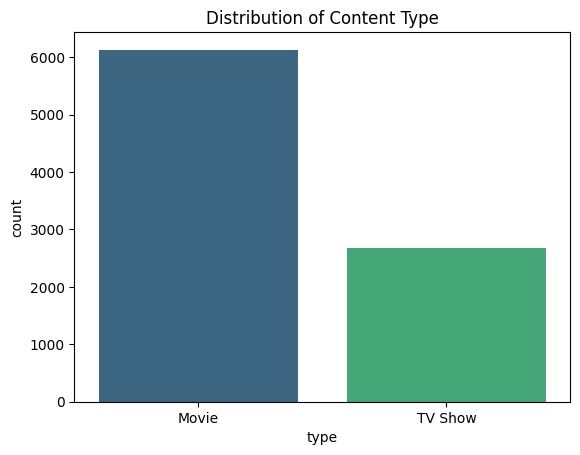

type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64

In [ ]:

sns.countplot(data=df, x="type", palette="viridis")
plt.title("Distribution of Content Type")
plt.show()
df['type'].value_counts(normalize = True)*100



Dataset menunjukkan bahwa Movie mendominasi katalog Netflix dengan sekitar 69%, sementara TV Show berada pada kisaran 31%.
Dominasi Movie ini menggambarkan bahwa Netflix lebih banyak merilis konten film dibandingkan serial pada periode data ini.
Namun, perlu dicatat bahwa data ini mencerminkan ketersediaan konten, bukan preferensi pengguna.

<h2>Penambahan kolom baru yang diambil dari durasi TV Show dan Movies dan Visualisasi<h2>

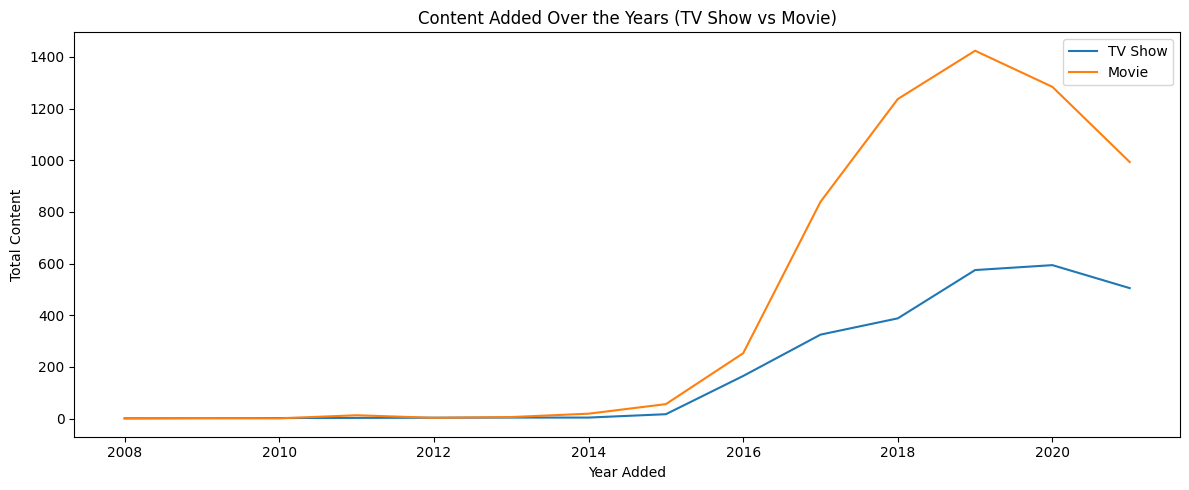

In [ ]:
tv_year = df[df["type"] == "TV Show"].groupby("year_added").size().reset_index(name="count")
movie_year = df[df["type"] == "Movie"].groupby("year_added").size().reset_index(name="count")



plt.figure(figsize=(12,5))

sns.lineplot(data=tv_year, x="year_added", y="count", label="TV Show")
sns.lineplot(data=movie_year, x="year_added", y="count", label="Movie")

plt.title("Content Added Over the Years (TV Show vs Movie)")
plt.xlabel("Year Added")
plt.ylabel("Total Content")
plt.legend()
plt.tight_layout()
plt.show()


Movie memuncak pada tahun 2019 sebagai tahun dengan penambahan konten terbanyak.
TV Show mulai meningkat sejak 2015, menunjukkan awal ekspansi Netflix ke produksi serial dalam jumlah lebih besar.

<h2>Visualisasi Top 10 Negara Produksi</h2>

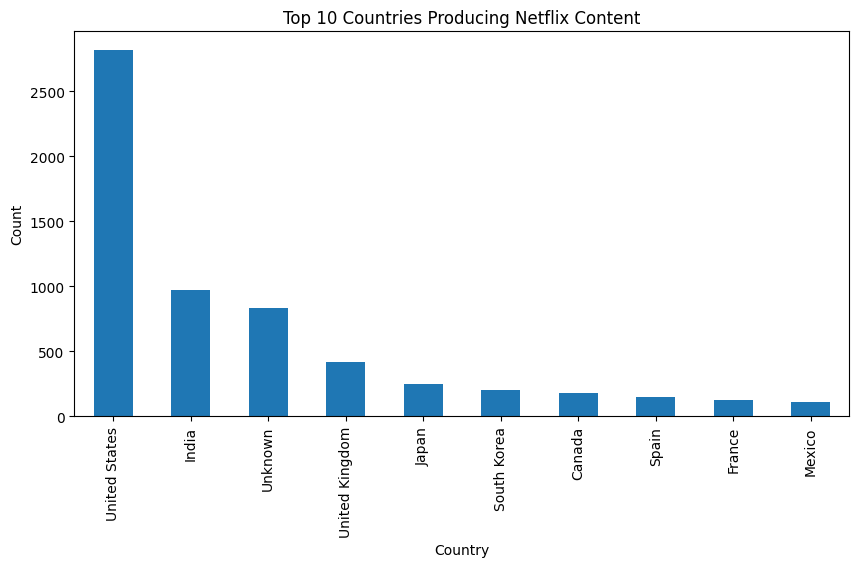

In [ ]:
country_df = df['country'].value_counts().head(10)

country_df.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


US tercatat sebagai negara dengan jumlah konten Netflix terbanyak, baik Movie maupun TV Show.
India berada di posisi kedua, menunjukkan tingginya volume produksi film dan serial dari industri hiburan India

Kategori ‘Unknown’ dibiarkan sebagai bagian dari distribusi karena informasi negara asal tidak tersedia pada metadata asli. Menghapus atau mengimputasinya berpotensi menimbulkan bias.

<h2>Visualisasi Genre pada Netflix</h2>

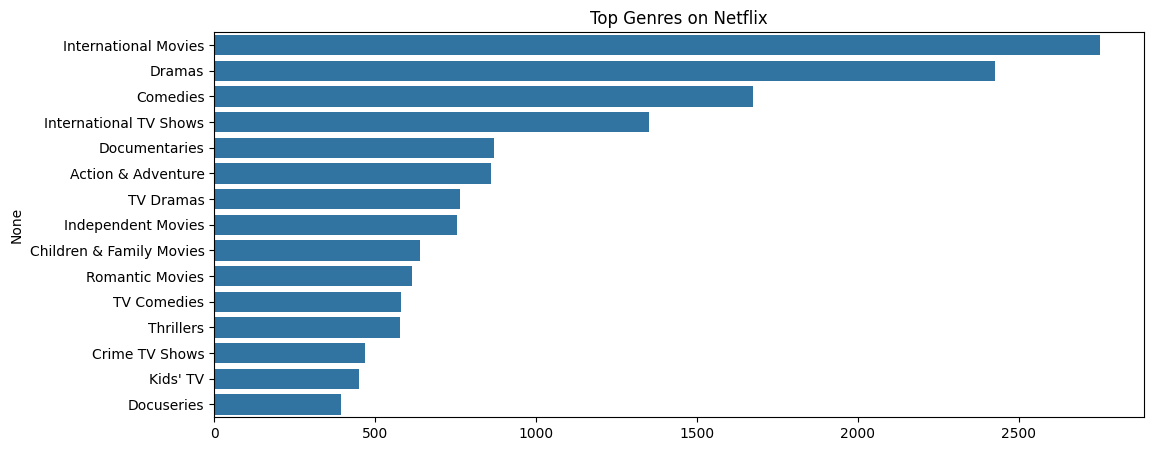

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64

In [ ]:
genre = df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(15)
plt.figure(figsize=(12,5))
sns.barplot(x=genre.values, y=genre.index)
plt.title("Top Genres on Netflix")
plt.show()

df['listed_in'].value_counts()

International Movies menjadi genre yang paling dominan pada katalog Netflix. Hal ini mencerminkan positioning Netflix sebagai platform global dengan distribusi konten lintas negara.

Drama dan Comedies menempati peringkat kedua dan ketiga, menunjukkan preferensi kuat pada konten yang bersifat naratif dan hiburan ringan.

Sementara itu, kategori Kids' TV tercatat memiliki kurang dari 500 judul, menandakan bahwa katalog Netflix lebih banyak berfokus pada konten untuk audiens umum (general audience) dibandingkan konten khusus anak.

Temuan ini menggambarkan bahwa strategi konten Netflix lebih diarahkan pada pasar dewasa global dibandingkan segmen anak.

**Key Insights

Berikut insight utama dari keseluruhan analisis Netflix:

✔ Movie mendominasi platform (≈70%)

Konten film jauh lebih banyak dibanding TV Show.

✔ Penambahan konten meningkat signifikan di tahun 2015–2019

Mencerminkan era “Netflix Original”.

✔ USA dan India adalah sumber konten terbesar

Netflix sangat bergantung pada dua negara ini untuk suplai konten.

✔ Genre internasional (Dramas & International Movies) menjadi pilar utama Netflix

Platform ini menargetkan audiens global, bukan hanya satu negara.

✔ Banyak data country yang hilang (‘Unknown’)

Menandakan metadata tidak lengkap, terutama pada konten lama.

<h1>Conclusion</h1>

Analisis dataset Netflix menunjukkan bahwa platform ini berfokus pada konten global dengan dominasi Movie dan genre drama internasional. Penambahan konten meningkat drastis pada tahun 2015–2019, sejalan dengan strategi ekspansi global Netflix dan produksi original.

USA tetap menjadi negara dengan kontribusi konten terbesar, diikuti India, sementara keberadaan kategori “Unknown” menandakan perlunya data pelengkap dari sumber tambahan.

Netflix menampilkan keberagaman signifikan dalam hal aktor, sutradara, rating, dan genre, mencerminkan visi mereka sebagai platform global.

Dataset juga mengungkap bahwa konten dewasa (TV-MA, TV-14) dan drama internasional adalah segmen paling dominan, sementara konten anak relatif kecil.

Secara keseluruhan, analisis ini memberikan gambaran strategis tentang preferensi produksi dan penambahan konten Netflix dari tahun ke tahun, sekaligus menampilkan bagaimana perusahaan ini menargetkan audiens internasional dengan variasi konten yang sangat luas